In [1]:
# Standard Data Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.shape

(165034, 14)

In [4]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
train_df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
train_df.isnull().values.any()

False

In [7]:
train_df["Surname"] = train_df["Surname"].str.strip()
train_df["Surname"] = train_df["Surname"].apply(str.lower) 
train_df["Geography"] = train_df["Geography"].str.strip()
train_df["Geography"] = train_df["Geography"].apply(str.lower) 
train_df["Gender"] = train_df["Gender"].str.strip()
train_df["Gender"] = train_df["Gender"].apply(str.lower) 

In [8]:
label = train_df["Exited"].values

features = train_df[["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]].values

split = (0.7,0.3)
shuffle = np.random.permutation(np.arange(features.shape[0]))
features, label = features[shuffle], label[shuffle]


splits = np.multiply(len(features), split).astype(int) 
train_features, val_features = np.split(features, [splits[0]])
train_label, val_label = np.split(label, [splits[0]])

In [9]:
#histgrams of features and labels

train_set = pd.concat([pd.DataFrame(train_features), pd.DataFrame(train_label)], axis=1)

train_set.columns = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]

for i in train_set.columns:
    display(train_set[i].value_counts())

CreditScore
850    1760
678    1600
684    1200
667    1137
683    1104
       ... 
386       1
423       1
436       1
382       1
419       1
Name: count, Length: 453, dtype: int64

Geography
france     66076
spain      25183
germany    24264
Name: count, dtype: int64

Gender
male      65172
female    50351
Name: count, dtype: int64

Age
37.00    6476
38.00    6465
35.00    6401
36.00    6041
34.00    6018
         ... 
82.00       4
84.00       4
83.00       2
32.34       1
36.44       1
Name: count, Length: 70, dtype: int64

Tenure
2     12658
7     12548
8     12351
4     12186
5     12077
1     11745
3     11689
9     11559
6     11076
10     4161
0      3473
Name: count, dtype: int64

Balance
0.00         62777
124577.33       59
127864.40       48
122314.50       48
102773.20       39
             ...  
136678.59        1
116539.30        1
98799.89         1
156771.02        1
148667.94        1
Name: count, Length: 23210, dtype: int64

NumOfProducts
2    59019
1    54145
3     2032
4      327
Name: count, dtype: int64

HasCrCard
1.0    87076
0.0    28447
Name: count, dtype: int64

IsActiveMember
0.0    57977
1.0    57546
Name: count, dtype: int64

EstimatedSalary
88890.05     123
129964.94     73
90876.95      69
140941.47     68
181224.56     66
            ... 
59903.72       1
133030.90      1
198402.12      1
199357.21      1
46859.46       1
Name: count, Length: 42896, dtype: int64

Exited
0    91172
1    24351
Name: count, dtype: int64

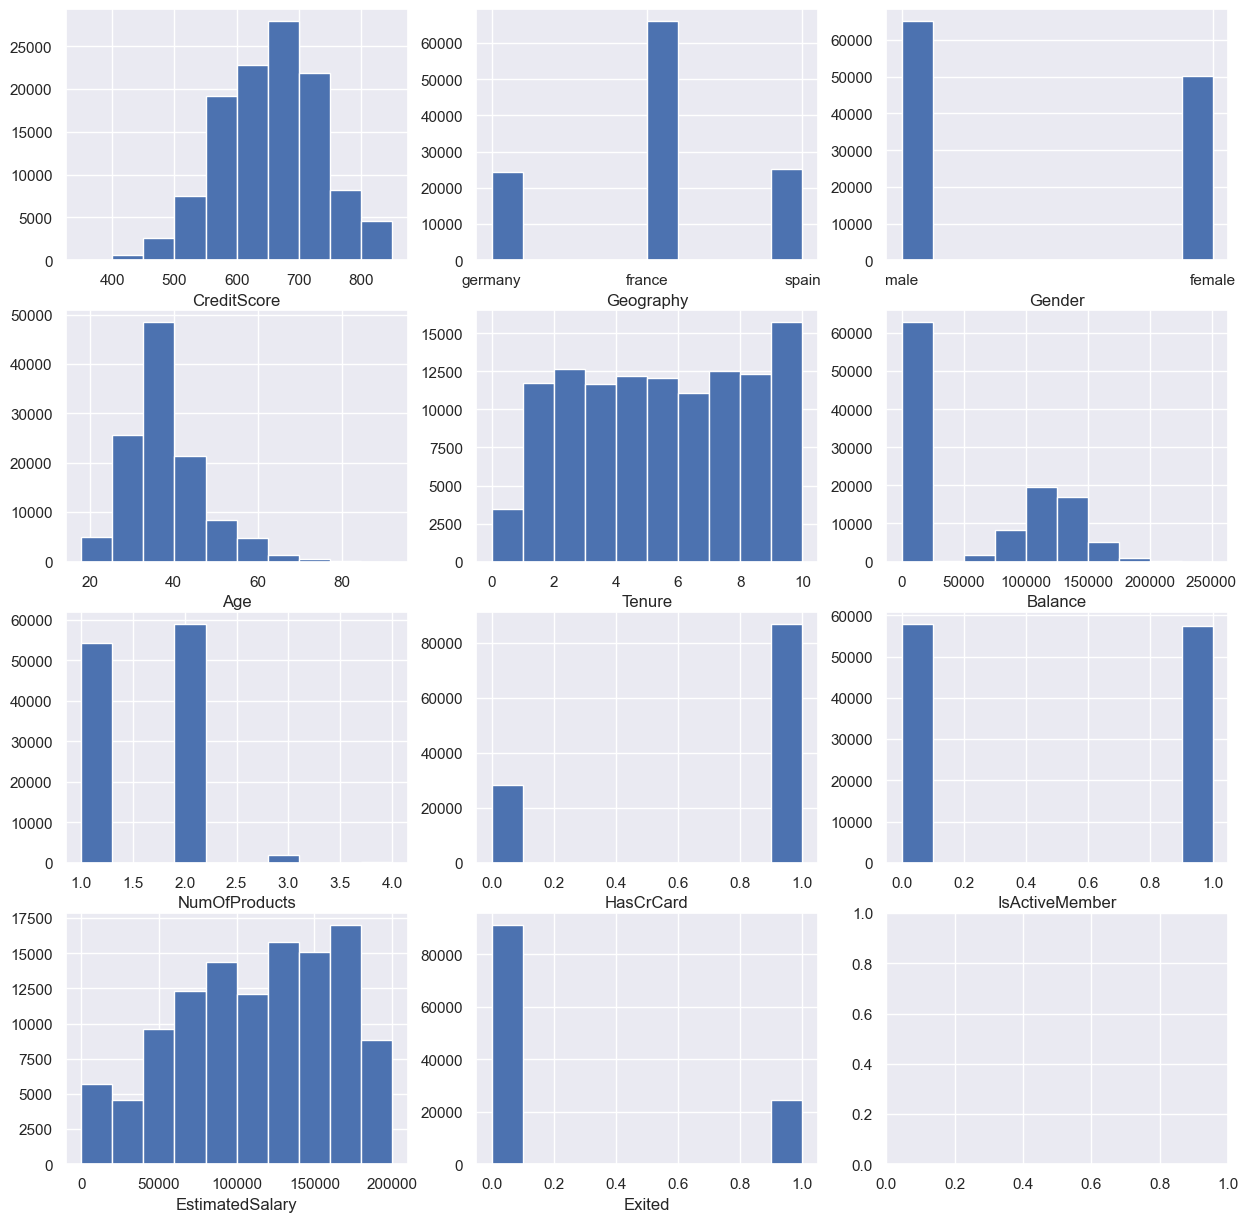

In [10]:
columns = train_set.columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
for idx, ax in enumerate(axes.flatten()):
    if idx >= len(columns):
        break
    # plot histogram
    ax.hist(train_set[columns[idx]])
    # set xlabel
    ax.set_xlabel(columns[idx])

In [11]:
from scipy.stats import shapiro

quantitative_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

alpha = 0.05

for i in quantitative_columns:
    stat, p = shapiro(train_set[i])
    if p > alpha:
        print(f'Variable {i} looks Gaussian (fail to reject H0) at {p:.5f}')
    else:
        print(f'Variable {i} does NOT look Gaussian (reject H0)  at {p:.5f}')

/Users/albertkao/anaconda3/envs/tensorflow/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable CreditScore does NOT look Gaussian (reject H0)  at 0.00000
Variable Age does NOT look Gaussian (reject H0)  at 0.00000
Variable Tenure does NOT look Gaussian (reject H0)  at 0.00000
Variable Balance does NOT look Gaussian (reject H0)  at 0.00000
Variable NumOfProducts does NOT look Gaussian (reject H0)  at 0.00000
Variable EstimatedSalary does NOT look Gaussian (reject H0)  at 0.00000


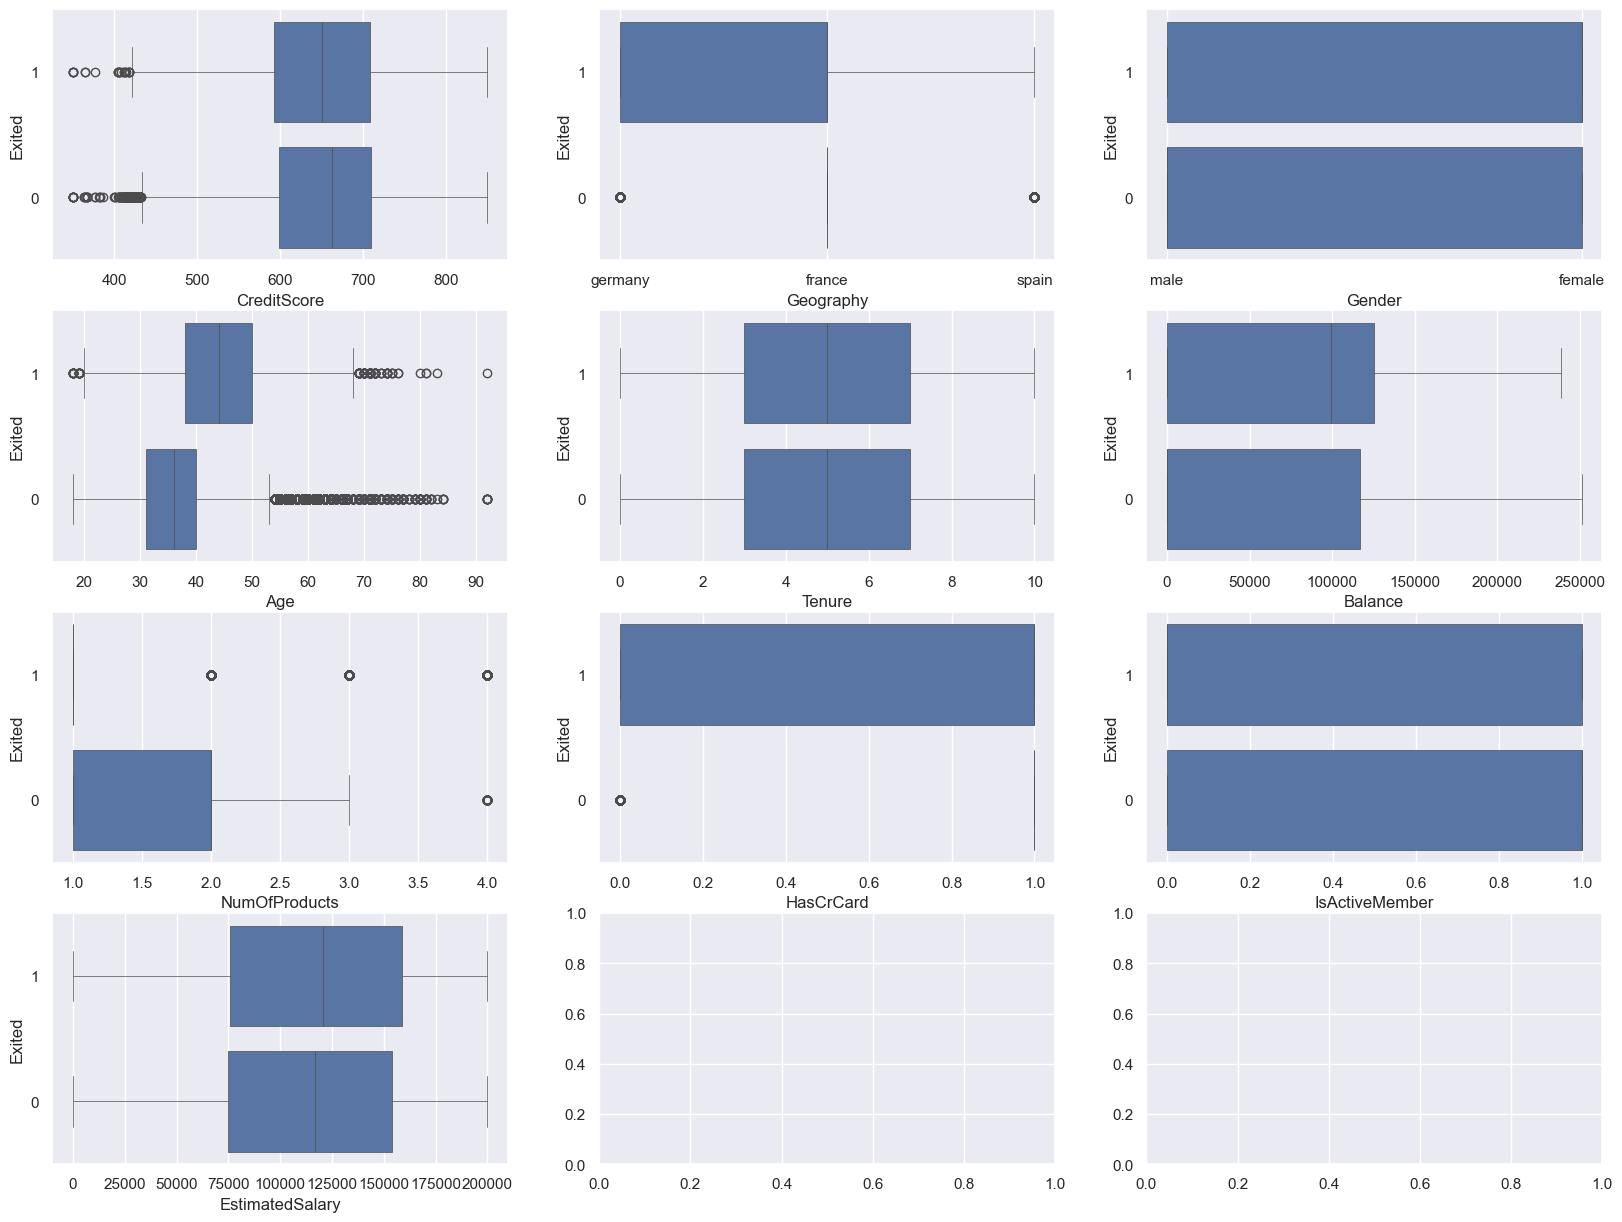

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
for idx, ax in enumerate(axes.flatten()):
    if idx >= (len(columns) - 1):
        break
    feature = train_set[columns[idx]]
    sns.boxplot(x = feature, y = train_set["Exited"], ax = axes[idx // 3][idx % 3], orient='h', linewidth=.5)
    axes[idx//3][idx%3].invert_yaxis()

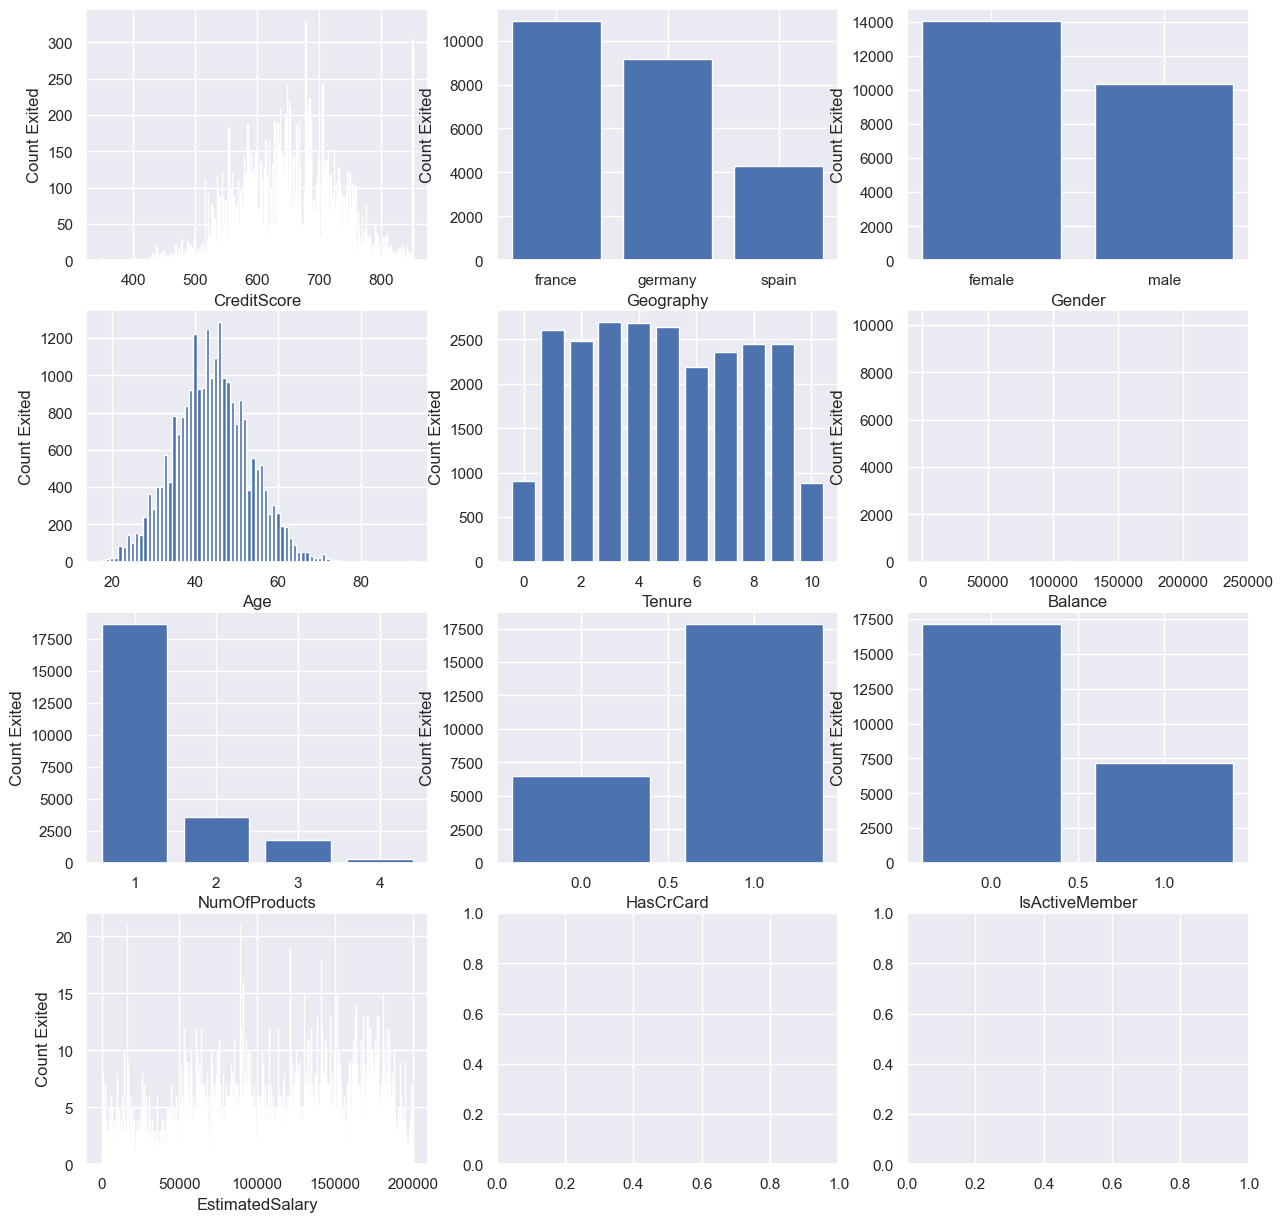

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
for idx, ax in enumerate(axes.flatten()):
    if idx >= (len(columns) - 1):
        break
    temp = train_set[train_set.Exited == 1].groupby(columns[idx]).aggregate("count")["Exited"]
    ax.bar(temp.index, temp.values)
    # set xlabel
    ax.set_xlabel(columns[idx])
    ax.set_ylabel("Count Exited")

In [16]:
from sklearn import preprocessing
import joblib

scaler = preprocessing.MinMaxScaler().fit(train_set[quantitative_columns])
train_set[quantitative_columns] = scaler.transform(train_set[quantitative_columns])

joblib.dump(scaler, "scaler.joblib")

train_set.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.748,germany,male,0.472973,0.2,0.556751,0.333333,0.0,0.0,0.064518,0
1,0.400,france,male,0.054054,0.5,0.000000,0.000000,0.0,0.0,0.609472,1
2,0.358,france,male,0.378378,0.8,0.000000,0.333333,0.0,1.0,0.632562,0
3,0.604,france,male,0.081081,0.4,0.000000,0.333333,1.0,1.0,0.063755,0
4,0.698,france,male,0.175676,0.8,0.363558,0.000000,1.0,1.0,0.820419,0


In [17]:
categorical_columns = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]

for i in categorical_columns:
    label_encoder = preprocessing.LabelEncoder().fit(train_set[i])
    encoder_name = f"{i}_encoder.joblib"
    joblib.dump(label_encoder, encoder_name)
    train_set[i] = label_encoder.transform(train_set[i])

train_set.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.748,1,1,0.472973,0.2,0.556751,0.333333,0,0,0.064518,0
1,0.400,0,1,0.054054,0.5,0.000000,0.000000,0,0,0.609472,1
2,0.358,0,1,0.378378,0.8,0.000000,0.333333,0,1,0.632562,0
3,0.604,0,1,0.081081,0.4,0.000000,0.333333,1,1,0.063755,0
4,0.698,0,1,0.175676,0.8,0.363558,0.000000,1,1,0.820419,0


In [50]:
val_set = pd.concat([pd.DataFrame(val_features), pd.DataFrame(val_label)], axis=1)

val_set.columns = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]

scaler = joblib.load("scaler.joblib")

val_set[quantitative_columns] = scaler.transform(val_set[quantitative_columns])


for i in categorical_columns:
    encoder_name = f"{i}_encoder.joblib"
    label_encoder = joblib.load(encoder_name)
    val_set[i] = label_encoder.transform(val_set[i])
    val_set.head()

val_set.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.866,2,0,0.256757,0.1,0.544802,0.000000,0,0,0.989490,1
1,0.602,2,0,0.243243,0.7,0.000000,0.333333,1,0,0.458248,0
2,0.492,0,1,0.243243,0.1,0.000000,0.333333,1,0,0.712841,0
3,0.792,0,0,0.135135,0.7,0.547176,0.000000,1,1,0.328516,0
4,0.766,2,0,0.202703,0.4,0.000000,0.333333,1,0,0.848290,0


In [51]:
train_set.to_csv("train_set.csv")
val_set.to_csv("val_set.csv")